<h3> Sergio Andres Rios Gomez</h3>
<h4> Paso 2: Análisis Exploratorio de Datos - EDA</h4>
<h4> K- Nearest Neighbors (KNN) </h4>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
ruta_archivo = '../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(ruta_archivo)

<h2> Metadata</h2>
<li>customerID: ID del cliente</li>
<li>gender: Si el cliente es hombre o mujer</li>
<li>SeniorCitizen: Si el cliente es una persona mayor o no (1, 0)</li>
<li>Partner: Si el cliente tiene pareja o no (Sí, No)</li>
<li>Dependents: Si el cliente tiene dependientes o no (Sí, No)</li>
<li>tenure: Número de meses que el cliente ha permanecido en la empresa</li>
<li>PhoneService: Si el cliente tiene servicio telefónico o no (Sí, No)</li>
<li>MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, No hay servicio telefónico)</li>
<li>InternetService: Proveedor de servicios de internet del cliente (DSL, Fibra óptica, No)</li>
<li>OnlineSecurity:  Si el cliente tiene seguridad en línea o no (Sí, No, No hay internet)</li>
<li>OnlineBackup: Si el cliente tiene copia de seguridad en línea o no (Sí, No, Sin servicio de internet)</li>
<li>DeviceProtection:Si tiene protección del dispositivo o no (Sí, No, Sin servicio de internet)</li>
<li>TechSupport: Si el cliente tiene soporte técnico o no (Sí, No, Sin servicio de internet)</li>
<li>StreamingTV: Si el cliente tiene transmisión de TV o no (Sí, No, Sin servicio de internet)</li>
<li>StreamingMovies: Si el cliente tiene transmisión de películas o no (Sí, No, Sin servicio de internet)</li>
<li>Contract: La duración del contrato del cliente (Mes a mes, Un año, Dos años)</li>
<li>PaperlessBilling: Si el cliente tiene facturación electrónica o no (Sí, No)</li>
<li>PaymentMethod: Método de pago: Cheque electrónico, Cheque por correo, Transferencia bancaria (aut), TC</li>
<li>MonthlyCharges: Importe cobrado al cliente mensualmente</li>
<li>TotalCharges: Importe total cobrado al cliente</li>
<li>Churn: Si el cliente se dio de baja o no (Sí o No)</li>

<h4> Exploración inicial: </h4>

In [4]:
# Forma del DataFrame:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Convertir variables a numéricas.
df["tenure"] = pd.to_numeric(df["tenure"], errors='coerce')
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors='coerce')
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

<p> Información general del DataFrame: </p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<h2> Analisis Univariado: </h2>

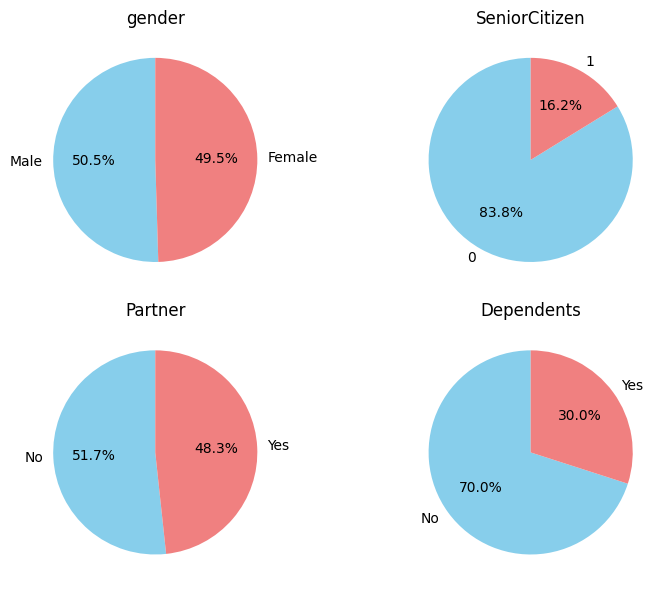

In [8]:
cols = ["gender", "SeniorCitizen", "Partner", "Dependents"]
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[i], startangle=90, colors=["skyblue", "lightcoral"])
    axes[i].set_title(col)
    axes[i].set_ylabel('')  # Ocultar etiqueta del eje Y

plt.tight_layout()
plt.show()

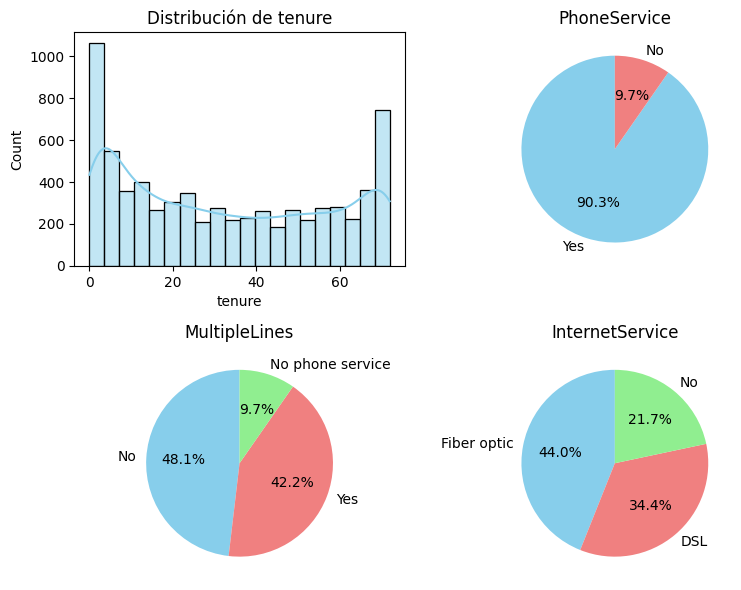

In [9]:
cols = ["tenure", "PhoneService", "MultipleLines", "InternetService"]
chart_types = ["bar", "pie", "pie", "pie"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    if chart_types[i] == "bar":
        # Gráfico de barras para tenure
        sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribución de {col}")
    else:
        # Gráfico de torta para las demás variables
        df[col].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[i], startangle=90, colors=["skyblue", "lightcoral", "lightgreen"])
        axes[i].set_title(col)
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

C:\Users\chech\AppData\Local\Temp\ipykernel_23588\2843867089.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")


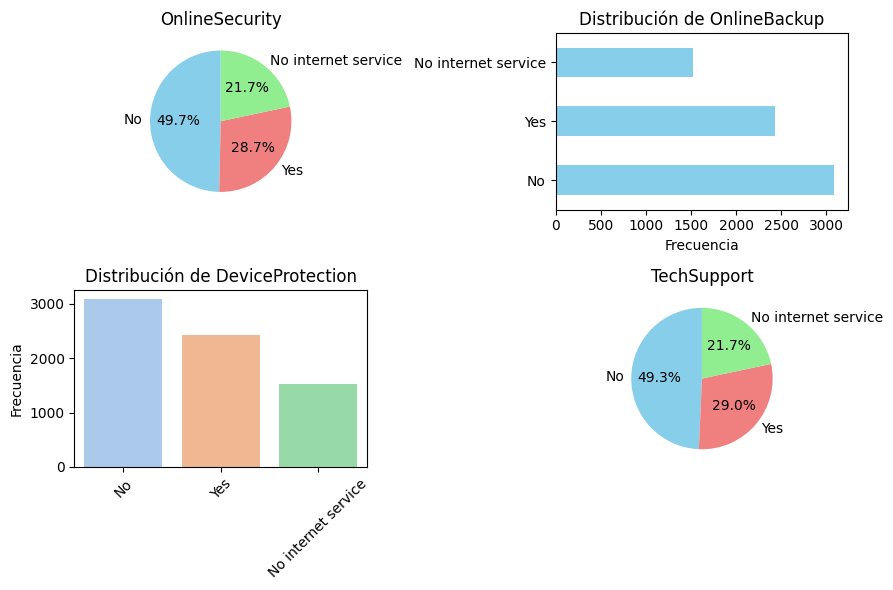

In [10]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
chart_types = ["pie", "barh", "bar", "pie"]

fig, axes = plt.subplots(2, 2, figsize=(9, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    if chart_types[i] == "bar":
        # Gráfico de barras verticales
        sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis="x", rotation=45)
    elif chart_types[i] == "barh":
        # Gráfico de barras horizontales
        df[col].value_counts().plot(kind="barh", ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel("Frecuencia")
        axes[i].set_ylabel("")
    else:
        # Gráfico de torta
        df[col].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[i], startangle=90, colors=["skyblue", "lightcoral", "lightgreen"])
        axes[i].set_title(col)
        axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

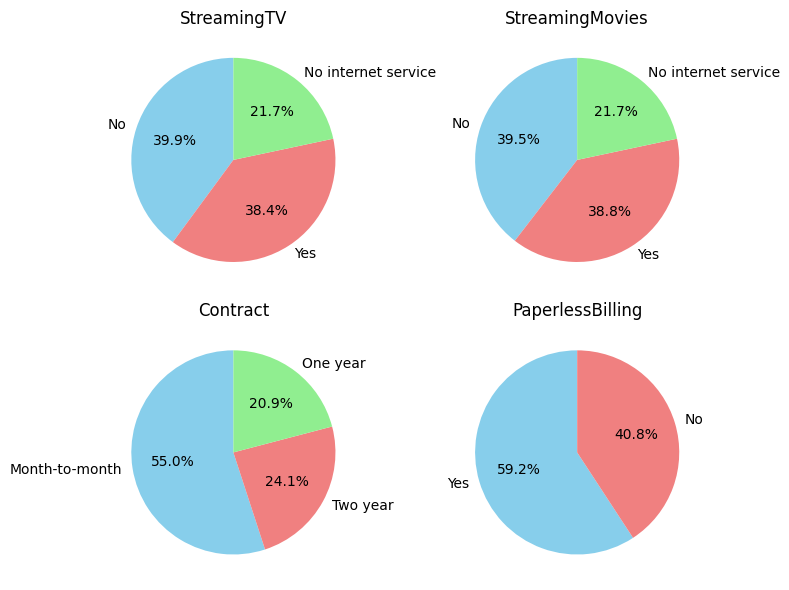

In [11]:
cols = ["StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    df[col].value_counts().plot.pie(
        autopct="%1.1f%%", 
        ax=axes[i], 
        startangle=90, 
        colors=["skyblue", "lightcoral", "lightgreen"]
    )
    axes[i].set_title(col)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

C:\Users\chech\AppData\Local\Temp\ipykernel_23588\1326222784.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")
C:\Users\chech\AppData\Local\Temp\ipykernel_23588\1326222784.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")


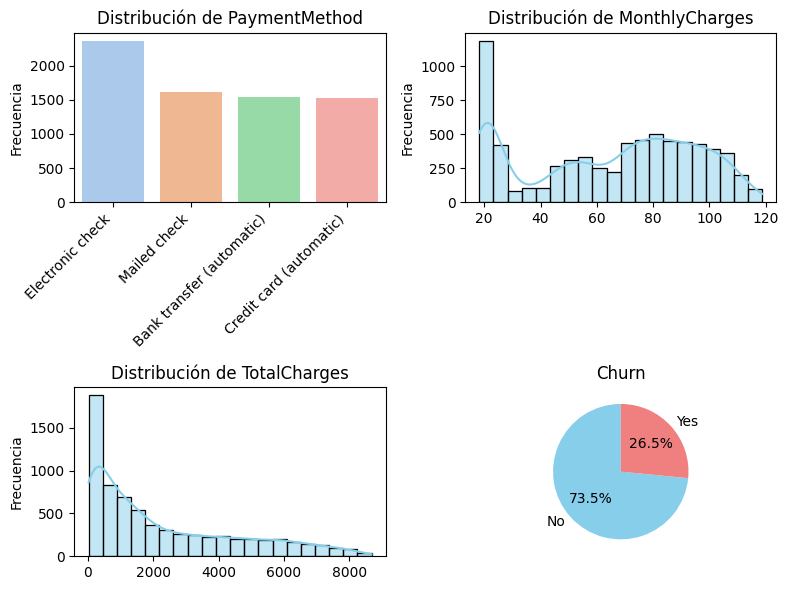

In [12]:
cols = ["PaymentMethod", "MonthlyCharges", "TotalCharges", "Churn"]
chart_types = ["bar", "bar", "bar", "pie"]

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    if chart_types[i] == "bar":
        # Gráfico de barras para columnas categóricas o numéricas
        if df[col].dtype == "object":
            sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")
        else:
            sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribución de {col}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frecuencia")
    else:
        # Gráfico de torta para Churn
        df[col].value_counts().plot.pie(autopct="%1.1f%%", ax=axes[i], startangle=90, colors=["skyblue", "lightcoral"])
        axes[i].set_title(col)
        axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

<h3> Correlación entre Variables Numéricas</h3>

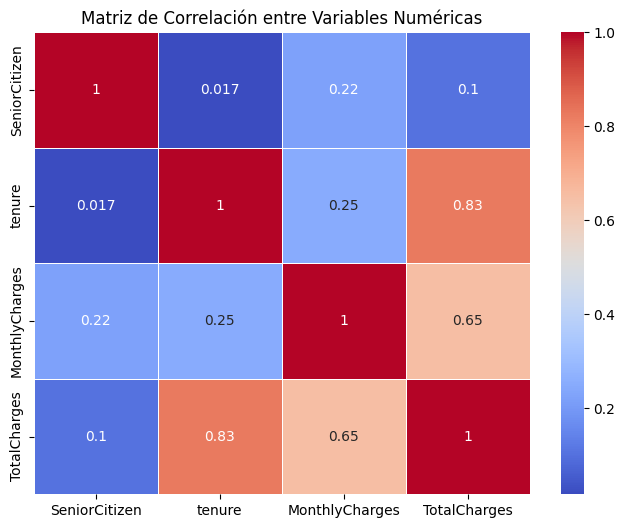

In [14]:
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
numeric_df = df[numeric_cols]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

<h4> Conclusiones EDA</h4>
<li> gender (Género): La distribución es casi 50/50, con un ligero predominio de hombres (50.5%) sobre mujeres (49.5%).</li>
<li> SeniorCitizen (Adulto Mayor): La gran mayoría de los clientes no son adultos mayores (83.8% son "0", es decir, no son adultos mayores). Solo el 16.2% son adultos mayores ("1"). Esta variable muestra un desequilibrio significativo. KNN puede ser sensible a desequilibrios de clase.</li>
<li> Partner (Pareja): La distribución es casi uniforme, con un ligero predominio de clientes sin pareja (51.7%)</li>
<li> Dependents (Dependientes): La mayoría de los clientes no tienen dependientes (70.0%), mientras que el 30.0% sí los tienen.</li>
<li> Distribución de "tenure" (Antigüedad): El histograma muestra una distribución bimodal, con picos en los valores bajos (alrededor de 1) y altos (alrededor de 70) de "tenure". hay dos grupos principales de clientes: los que son muy nuevos y los que son muy leales. "tenure" es una variable numérica importante que puede ser un buen predictor de "Churn"</li>
<li> "PhoneService" (Servicio Telefónico): La gran mayoría de los clientes tienen servicio telefónico (90.3%), mientras que solo el 9.7% no lo tienen.</li>
<li> "MultipleLines" (Líneas Múltiples): La mayoría de los clientes con servicio telefónico tienen líneas múltiples (42.2%)</li>
<li> "InternetService" (Servicio de Internet): La mayoría de los clientes tienen fibra óptica</li>
<li> "OnlineSecurity" (Seguridad en Línea): La mayoría de los clientes no tienen seguridad en línea (49.7%)</li>
<li>"OnlineBackup" (Copia de Seguridad en Línea): La mayoría de los clientes no tienen copia de seguridad en línea. </li>
<li> "DeviceProtection" (Protección de Dispositivos): La mayoría de los clientes no tienen protección de dispositivos.</li>
<li> "TechSupport" (Soporte Técnico): La mayoría de los clientes no tienen soporte técnico (49.3%).</li>
<li> Correlación Fuerte entre tenure y TotalCharges</li>
<li> Correlación Moderada entre MonthlyCharges y TotalCharges</li>





